<a href="https://colab.research.google.com/github/fbison/PrevisaoTemperatura/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

def read_file(filename):
  with open(filename, 'r') as f:
    lines = f.readlines()
  return lines

def read_numbers(lines):
  # Converte as linhas para um array de números de ponto flutuante
  numbers = []
  for line in lines:
    # Remove espaços em branco e converte cada número para float com duas casas decimais
    numbers.extend([round(float(num), 2) for num in line.strip().split()])
  return numbers

# Upload the file to Colab
from google.colab import files
uploaded = files.upload()

# Read the lines from the uploaded file
xTrain = read_numbers(read_file('Xtrain.txt'))
xTest = read_numbers(read_file('Xtest.txt'))
print(xTrain)

Saving Xtest.txt to Xtest (1).txt
Saving Xtrain.txt to Xtrain.txt
[5727.99, 5635.07, 5599.42, 5567.89, 5530.23, 5457.2, 5413.43, 5532.47, 5503.79, 5634.86, 5804.85, 5834.6, 5817.14, 5823.04, 6053.14, 6201.81, 6082.41, 6227.16, 6181.59, 6043.89, 6156.19, 6245.51, 6355.85, 6432.1, 6286.46, 6338.78, 6487.97, 6444.6, 6508.52, 6652.19, 6432.91, 6293.45, 6214.68, 6188.8, 6411.65, 6299.14, 6222.59, 6050.99, 6096.31, 5968.46, 5909.39, 6143.34, 6123.29, 6277.31, 6363.58, 6244.15, 6130.75, 6165.26, 6257.25, 6222.76, 6304.19, 6227.71, 6227.1, 6348.41, 6352.86, 6292.14, 6337.13, 6314.7, 6248.95, 6202.71, 6028.06, 6126.1, 6294.76, 6270.03, 6259.4, 6232.55, 6270.04, 6276.87, 6254.01, 6334.62, 6382.76, 6415.78, 6358.07, 6390.98, 6464.29, 6534.28, 6512.41, 6489.64, 6560.21, 6588.26, 6551.74, 6563.79, 6513.88, 6535.92, 6458.88, 6446.87, 6521.78, 6605.81, 6626.94, 6612.66, 6651.58, 6631.08, 6626.75, 6608.68, 6631.32, 6744.94, 6733.54, 6766.04, 6798.15, 6798.92, 6675.62, 6648.61, 6588.85, 6503.36, 6401.0

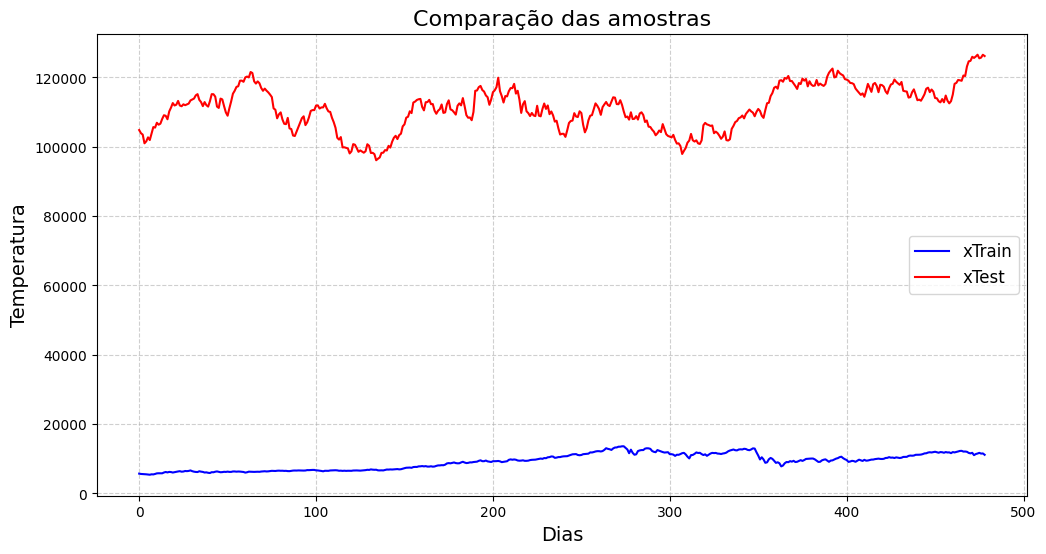

In [49]:
import matplotlib.pyplot as plt

def plot_comparison(xTrain, xTest):
    plt.figure(figsize=(12, 6))

    # Plotar os dados de xTrain e xTest
    plt.plot(range(len(xTrain)), xTrain, label="xTrain", color="blue")
    plt.plot(range(len(xTest)), xTest, label="xTest", color="red")

    # Configurar o gráfico
    plt.title("Comparação das amostras", fontsize=16)
    plt.xlabel("Dias", fontsize=14)
    plt.ylabel("Temperatura", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    # Mostrar o gráfico
    plt.show()


plot_comparison(xTrain, xTest)


In [32]:
import numpy as np

def create_matrix(xTrain, w, h):
    return np.array([xTrain[i:i + w] for i in range(len(xTrain) - w - h + 1)])

def distance_vector(matrixTrain, lineMatrixTest, n):
    # Calcula as distâncias vetorizadamente para as primeiras `n` linhas de `matrixTrain`
    diffs = matrixTrain[:n] - lineMatrixTest
    distances = np.sum(diffs ** 2, axis=1)
    return distances

def create_YTest(matrixTrain, matrixTest, Ytrain, k):
    YTest = []
    n = len(Ytrain)  # Limite para o número de linhas consideradas em `matrixTrain`

    for lineMatrixTest in matrixTest:
        # Calcula distâncias de forma vetorizada para as primeiras `n` linhas de `matrixTrain`
        distances = distance_vector(matrixTrain, lineMatrixTest, n)

        # Encontra os índices das k menores distâncias usando `np.argpartition`
        nearest_indices = np.argpartition(distances, k)[:k]

        # Seleciona os valores correspondentes em `Ytrain` e calcula a média
        nearest_values = np.array(Ytrain)[nearest_indices]
        YTest.append(np.mean(nearest_values))

    return YTest

def mean_absolute_error(y_true, y_pred):
    min_length = min(len(y_true), len(y_pred))
    return np.mean(np.abs(np.array(y_true[:min_length]) - np.array(y_pred[:min_length])))
def knn(w, h, k):
  # Calcular erro com os parâmetros atuais
  matrixTrain = create_matrix(xTrain, w, h)
  matrixTest = create_matrix(xTest, w, h)
  yTrain = [xTrain[i + w + h -1] for i in range(len(xTrain) - w - h)]
  yTest = create_YTest(matrixTrain, matrixTest, yTrain, k)
  error = mean_absolute_error(yTrain, yTest)
  return yTest, error

Erro ao processar k=475: kth(=475) out of bounds (475)
Erro ao processar w=476: kth(=2) out of bounds (2)
Erro ao processar h=474: kth(=2) out of bounds (2)


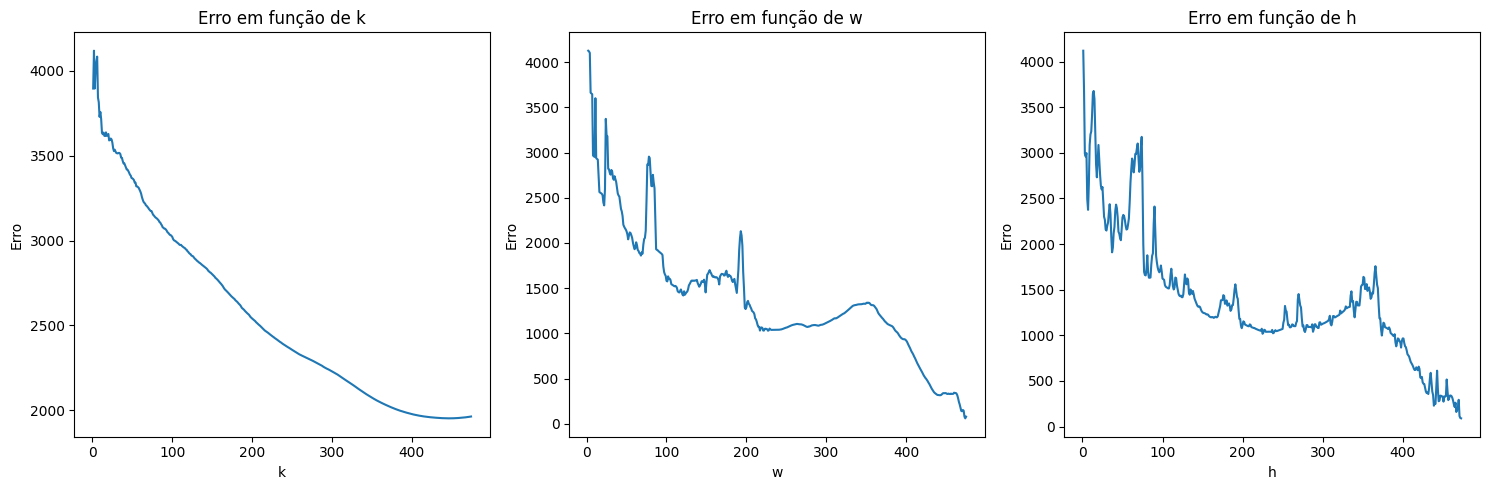

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Valores fixos para os parâmetros que não estão sendo testados
DEFAULT_W = 3
DEFAULT_K = 2
DEFAULT_H = 1

def evaluate_parameter_variation(param_name, param_values):
    errors = []
    values = []
    for value in param_values:
        # Definir os valores padrão para os parâmetros
        test_params = {
            'w': DEFAULT_W,
            'k': DEFAULT_K,
            'h': DEFAULT_H
        }
        # Alterar o parâmetro que está sendo testado
        test_params[param_name] = value

        # Respeitar as limitações
        if test_params['k'] < 1 or test_params['w'] < 2 or test_params['h'] < 1 or test_params['k'] > len(xTrain) - test_params['w'] - test_params['h']:
           return values, errors;


        # Avaliar a função knn
        try:
            # Avaliar a função knn
            yTest, error = knn(test_params['w'], test_params['h'], test_params['k'])
            errors.append(error)
            values.append(value)
        except Exception as e:
            print(f"Erro ao processar {param_name}={value}: {e}")
            return values, errors;
    return values, errors  # Retorna apenas os valores válidos


# Variáveis para teste (modifique os limites conforme necessário)
k_values = range(1, len(xTrain) - DEFAULT_W - DEFAULT_H + 1)
w_values = range(2, len(xTrain)- DEFAULT_H)
h_values = range(1, len(xTrain) - DEFAULT_W )

# Avaliar variação de k
k_valid_values, k_errors = evaluate_parameter_variation('k', k_values)

# Plotar gráficos
plt.figure(figsize=(15, 5))

# Gráfico para k
plt.subplot(1, 3, 1)
plt.plot(k_valid_values, k_errors)
plt.title('Erro em função de k')
plt.xlabel('k')
plt.ylabel('Erro')

# Avaliar variação de w
w_valid_values, w_errors = evaluate_parameter_variation('w', w_values)
# Gráfico para w
plt.subplot(1, 3, 2)
plt.plot(w_valid_values, w_errors)
plt.title('Erro em função de w')
plt.xlabel('w')
plt.ylabel('Erro')

# Avaliar variação de h
h_valid_values, h_errors = evaluate_parameter_variation('h', h_values)
# Gráfico para h
plt.subplot(1, 3, 3)
plt.plot(h_valid_values, h_errors)
plt.title('Erro em função de h')
plt.xlabel('h')
plt.ylabel('Erro')

plt.tight_layout()
plt.show()


In [65]:
len(xTrain)

479

In [19]:
def optimize_parameters(xTrain, xTest, k_values, w_values, h_values):
    best_error = float('inf')
    best_params = {'k': None, 'w': None, 'h': None}

    # Iterar sobre todos os valores de k, w e h
    for k in k_values:
        for w in w_values:
            for h in h_values:
                yTest, error = knn(w, h, k)

                # Atualizar os melhores parâmetros se o erro atual for menor
                if error < best_error:
                    best_error = error
                    best_params = {'k': k, 'w': w, 'h': h}
                    print(f"Novo melhor erro encontrado: {best_error} com k={k}, w={w}, h={h}")

    return best_params, best_error

In [46]:
import random
import matplotlib.pyplot as plt

def optimize_parameters_random(xTrain, xTest, k_start, w_start, h_start, max_iterations=1000, random_jump_chance=0.2, max_jump=3, refinement_iterations=25, refinement_range=2):
    best_params = {'k': k_start, 'w': w_start, 'h': h_start}
    best_error = float('inf')
    increments = {'k': 1, 'w': 1, 'h': 1}

    # Lista para armazenar o progresso do erro
    error_progress = []

    # Função interna para uma fase de otimização
    def optimization_phase(current_params, current_error, max_jump):
        for iteration in range(max_iterations):
            improved = False
            for param in ['k', 'w', 'h']:
                if random.random() < random_jump_chance:
                    test_params = current_params.copy()
                    test_params[param] = max(1, current_params[param] + random.randint(-max_jump, max_jump))
                else:
                    for direction in [-1, 1]:
                        test_params = current_params.copy()
                        test_params[param] += direction * increments[param]

                if test_params['k'] < 1 or test_params['w'] < 2 or test_params['h'] < 1 or test_params['k'] > len(xTrain) - test_params['w'] - test_params['h'] + 1:
                    continue

                yTest, error = knn(test_params['w'], test_params['h'], test_params['k'])

                if error < current_error:
                    current_error = error
                    current_params = test_params
                    improved = True
                    #print(f"Iteração {iteration + 1}: Melhor erro {current_error} com parâmetros {current_params}")

            # Armazenar o erro da iteração atual
            error_progress.append(current_error)

            if not improved:
                #print("Nenhuma melhora adicional encontrada nesta fase. Parando a otimização.")
                break
        return current_params, current_error

    # Fase inicial de otimização
    best_params, best_error = optimization_phase(best_params, best_error, max_jump)

    # Refinamento: limitar a busca a uma faixa menor ao redor dos melhores valores
    for refinement in range(refinement_iterations):
        #print(f"Iniciando refinamento {refinement + 1} com alcance {refinement_range}")
        refined_jump = min(max_jump, refinement_range)
        best_params, best_error = optimization_phase(best_params, best_error, refined_jump)
        refinement_range = max(1, refinement_range // 2)  # Reduzir o alcance de refinamento

    # Plotar o gráfico da evolução do erro
    plt.figure(figsize=(10, 6))
    plt.plot(error_progress, label="Erro")
    plt.xlabel("Iterações")
    plt.ylabel("Erro")
    plt.title("Evolução do erro durante a otimização")
    plt.legend()
    plt.grid()
    plt.show()

    return best_params, best_error


In [54]:

yTest, error = knn(3, 1, 2) #w h k
print(yTest)
print(error)

yTest, error = knn(184, 39, 166) #w h k
print(yTest)
print(error)

[13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001, 13381.025000000001,

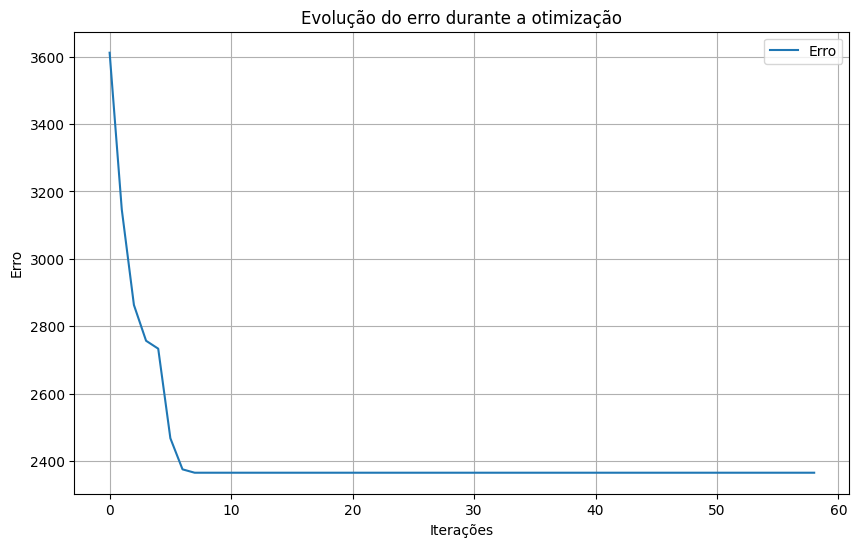

Melhores parâmetros encontrados: {'k': 17, 'w': 9, 'h': 7}
Melhor erro encontrado: 2365.6877702960232


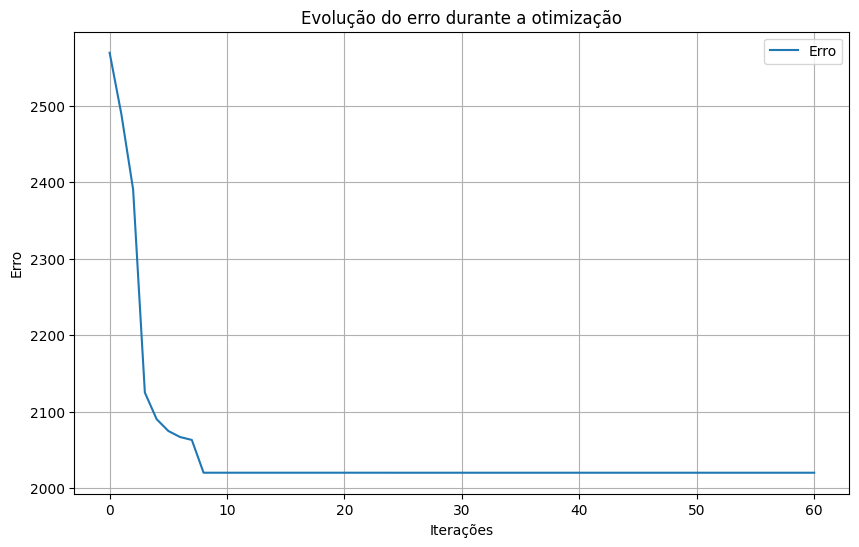

Melhores parâmetros encontrados: {'k': 43, 'w': 23, 'h': 38}
Melhor erro encontrado: 2020.0782691665738


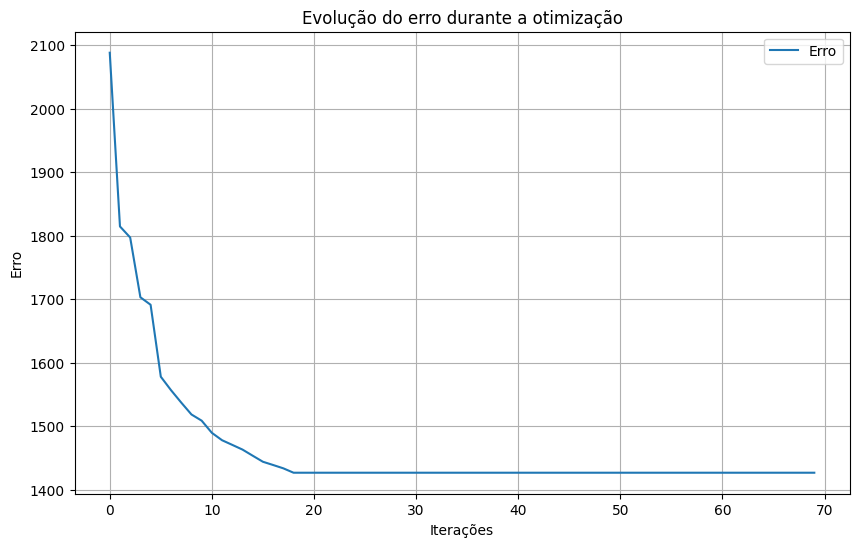

Melhores parâmetros encontrados: {'k': 64, 'w': 80, 'h': 44}
Melhor erro encontrado: 1426.7757548415495


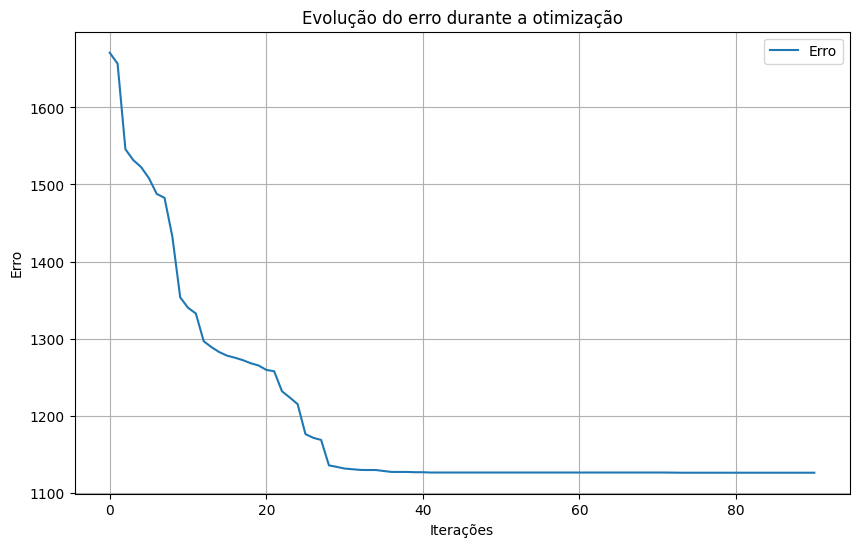

Melhores parâmetros encontrados: {'k': 134, 'w': 138, 'h': 42}
Melhor erro encontrado: 1125.9912731493039


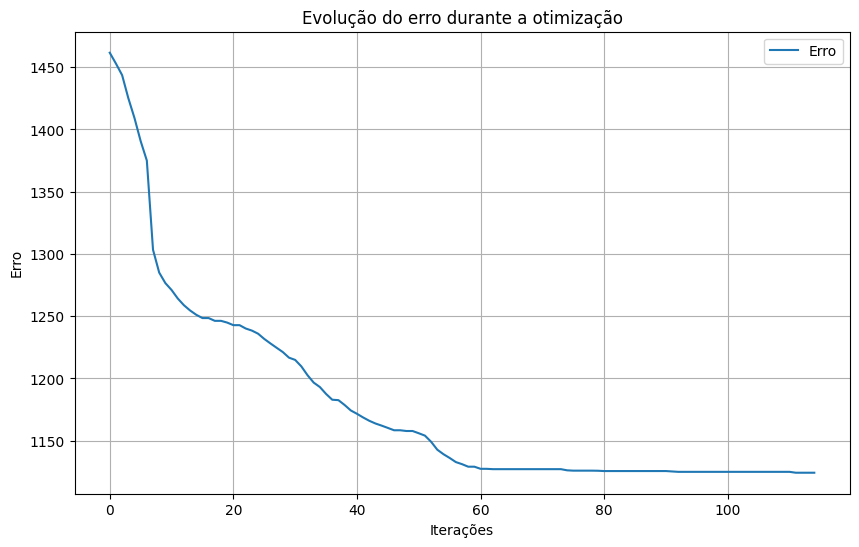

Melhores parâmetros encontrados: {'k': 134, 'w': 140, 'h': 40}
Melhor erro encontrado: 1124.2434223531172


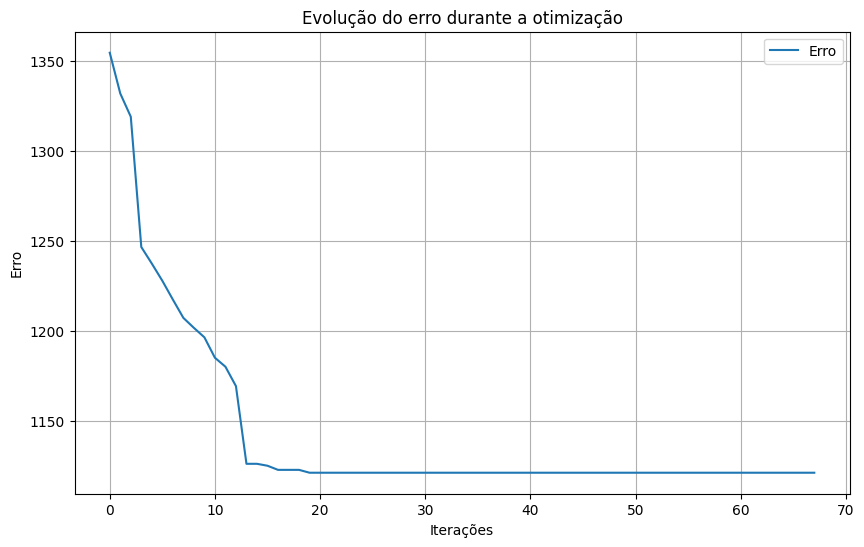

Melhores parâmetros encontrados: {'k': 135, 'w': 148, 'h': 31}
Melhor erro encontrado: 1121.4314617283956


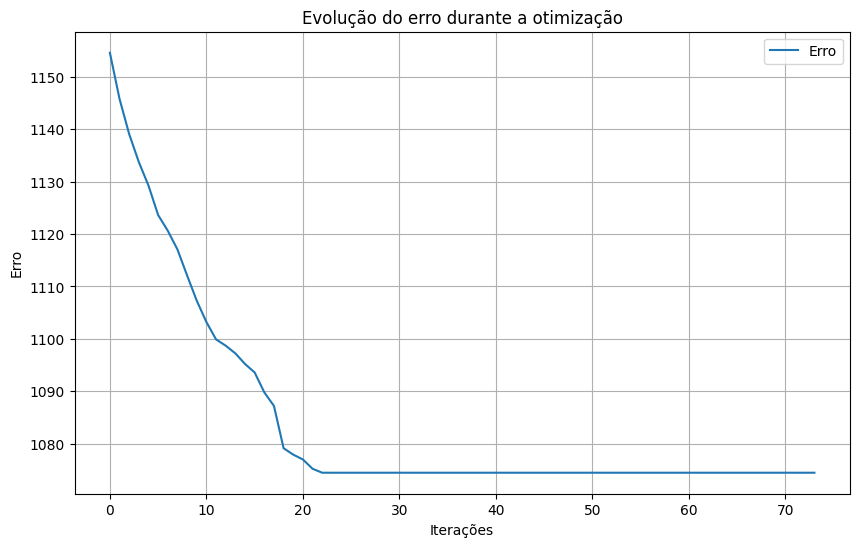

Melhores parâmetros encontrados: {'k': 166, 'w': 184, 'h': 39}
Melhor erro encontrado: 1074.4772091490968


In [47]:
k_values = range(4, 200)
w_values = range(45, 260)
h_values = range(230, 260)

# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 5, 5, 1, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 25, 25, 10, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 50, 50, 20, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)


# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 75, 75, 20, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 100, 100, 20, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 125, 125, 10, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 150, 150, 20, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

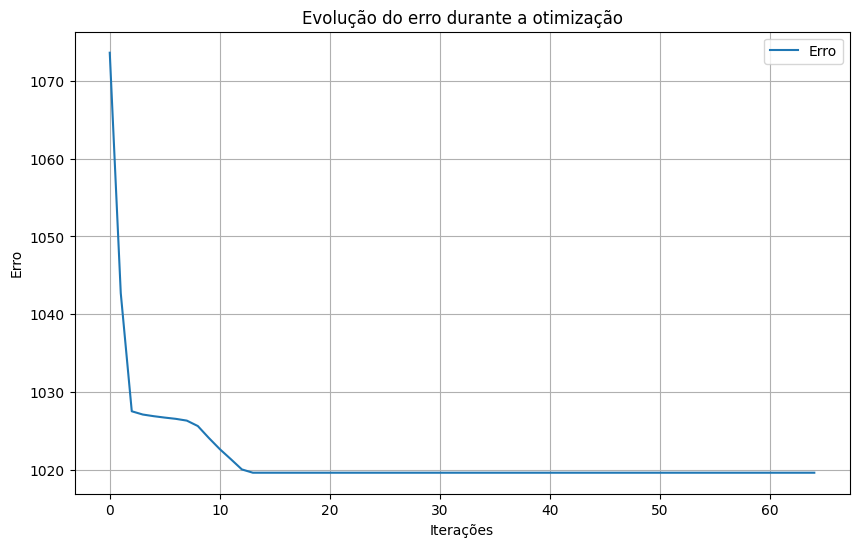

Melhores parâmetros encontrados: {'k': 234, 'w': 214, 'h': 16}
Melhor erro encontrado: 1019.6744727628463


In [57]:
# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 220, 220, 15, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)

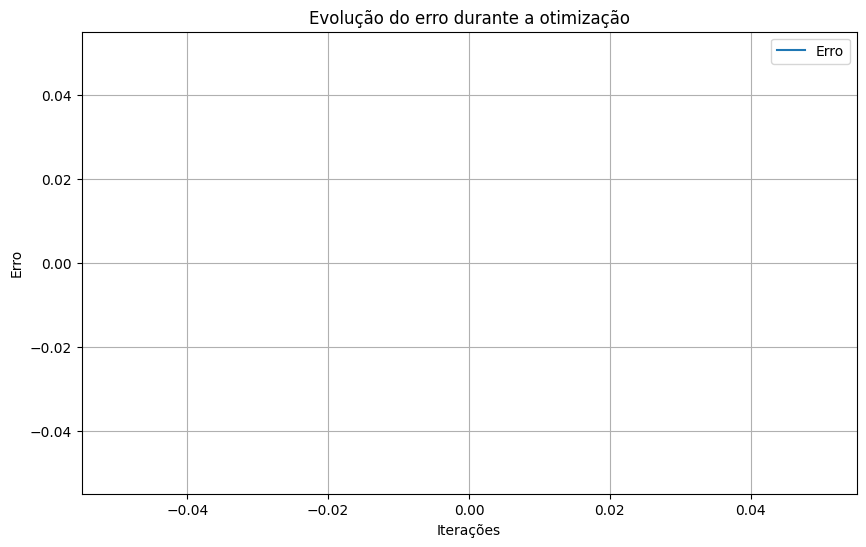

Melhores parâmetros encontrados: {'k': 250, 'w': 252, 'h': 40}
Melhor erro encontrado: inf


In [58]:
# Otimizar parâmetros
best_params, best_error = optimize_parameters_random(xTrain, xTest, 250, 252, 40, max_jump=15, refinement_iterations=50, refinement_range=3)
print("Melhores parâmetros encontrados:", best_params)
print("Melhor erro encontrado:", best_error)